In [1]:
# Dependencies

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Open up csv file

vehicles_data = os.path.join("..", "resource", "vehicles.csv")

vehicles_df = pd.read_csv(vehicles_data)

vehicles_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [198]:
# find the different columns in the csv

vehicles_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [199]:
# drop the unwanted rows from the csv

vehicles_column = vehicles_df.drop(["url", "region_url", "image_url", "description", "county", "VIN"], axis = 1)
vehicles_column.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
# count the number of data in each column for data cleaning

vehicles_column.count()

id              426880
region          426880
price           426880
year            425675
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
drive           296313
size            120519
type            334022
paint_color     296677
state           426880
lat             420331
long            420331
posting_date    426812
dtype: int64

In [6]:
# Remove the duplicate data, if any

vehicles_duplicate = vehicles_column[vehicles_column.duplicated(subset = ["id"])]
vehicles_duplicate["id"].unique()

array([], dtype=int64)

In [7]:
# Remove the NaN data

vehicles_na = vehicles_column.dropna(how = "any")
vehicles_na

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.518900,2021-05-03T14:02:03-0500
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200,2021-04-29T17:19:18-0500
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.461820,2021-04-27T12:20:01-0500
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.401600,2021-04-26T11:15:36-0500
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.770400,2021-04-24T18:39:59-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,7302963673,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,wy,43.452800,-110.739300,2021-04-06T21:04:03-0600
426809,7302963273,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,wy,43.452800,-110.739300,2021-04-06T21:02:26-0600
426831,7302384818,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,wy,41.143700,-104.796200,2021-04-05T18:10:52-0600
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy,43.642930,-108.222976,2021-04-05T16:29:38-0600


In [8]:
# count the number of data in each column for data cleaning

vehicles_na.count()

id              79016
region          79016
price           79016
year            79016
manufacturer    79016
model           79016
condition       79016
cylinders       79016
fuel            79016
odometer        79016
title_status    79016
transmission    79016
drive           79016
size            79016
type            79016
paint_color     79016
state           79016
lat             79016
long            79016
posting_date    79016
dtype: int64

In [9]:
# Sort the data for the year 2000 to 2022

vehicles_sorted = vehicles_na[(vehicles_na["year"] >= 2000) & (vehicles_na["year"] <= 2022)]
vehicles_sorted.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [10]:
# Remove the outlier price

vehicles_price_out = vehicles_sorted[((vehicles_sorted["price"] != 1234) &
                                  (vehicles_sorted["price"] != 12345) & 
                                  (vehicles_sorted["price"] != 123456) &
                                  (vehicles_sorted["price"] != 1234567) &
                                  (vehicles_sorted["price"] != 12345678) &
                                  (vehicles_sorted["price"] != 123456789) &
                                  (vehicles_sorted["price"] != 1234567890))]
vehicles_price_out.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [123]:
# Remove the outlier price

vehicles_price = vehicles_price_out[((vehicles_sorted["price"] > 1000) & (vehicles_sorted["price"] < 200000))]
vehicles_price.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [158]:
# Reset the index and get the cleaned dataset

vehicles_cleaned_df = vehicles_price.reset_index(drop = True)
vehicles_cleaned_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
1,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
2,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
3,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
4,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [125]:
# count the number of data in each column for the cleaned dataset

vehicles_cleaned_df.count()

id              66325
region          66325
price           66325
year            66325
manufacturer    66325
model           66325
condition       66325
cylinders       66325
fuel            66325
odometer        66325
title_status    66325
transmission    66325
drive           66325
size            66325
type            66325
paint_color     66325
state           66325
lat             66325
long            66325
posting_date    66325
dtype: int64

In [126]:
# Export the cleaned dataset to a folder

vehicles_cleaned_df.to_csv("../output_data/vehicles_cleaned.csv")

# The different types of vehicles listed in US from the year 2000 to 2022

# Summary

* The cleaned dataset of vehicles listed in the US was used for drawing conclusions about the different types of vehicles listed in US from the year 2000 to 2022. 
* The number of different types of vehicles listed was found and the percentage of each type of vehicles was calculated.
* The top and bottom 5 types of vehicles listed were found out.
* The year-wise trend of number of different types of cars listed was plotted to understand how it has changed from 2000 to 2022.
* The top 3 manufacturers listed for vehicle types SUV and sedan were found out.
* The year-wise trend of maximum price of suv and sedan cars listed was plotted to understand how it has changed from 2000 to 2022.
* The price of the top 3 manufacturers of SUV and sedan was plotted to understand the maximum price of the vehicles listed.

In [197]:
# find the number of different types of vehicles listed

type_df = vehicles_cleaned_df.groupby("type")["id"].count()

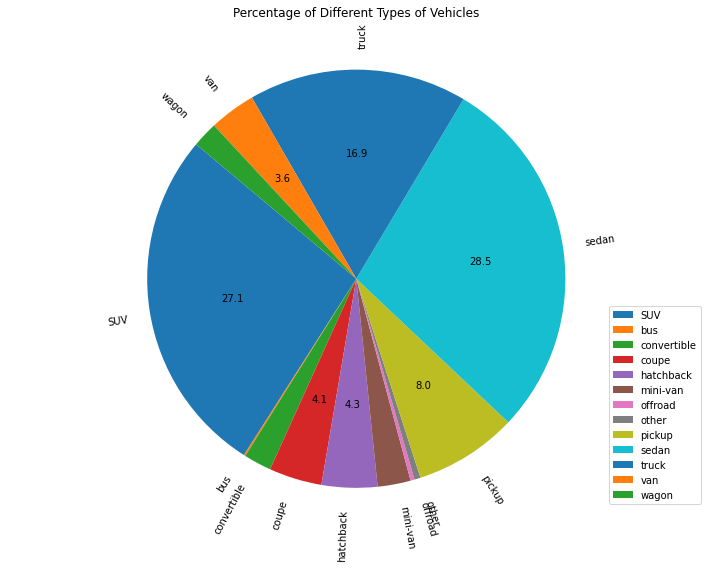

In [149]:
# plot the different types of vehicles listed in a pie chart

labels = type_df.index.values

fig = plt.figure(figsize=(10,8))

plt.pie(type_df, labels = labels, 
        autopct = lambda p: format(p, ".1f") if p > 3 else None, 
        shadow = False, startangle = 140, textprops={'fontsize': 10}, 
        rotatelabels = 18)

plt.title("Percentage of Different Types of Vehicles", pad = 32)
plt.ylabel("")

plt.legend(labels, loc = "lower right")

plt.axis("equal")
plt.tight_layout()

plt.savefig("../output_data/Percentage of Different Types of Vehicles.png")

# Observation
* It can be seen that from among the 13 different types of vehicles listed, SUV and sedan holds the highest percentage with 27.1% and 28.5% respectively.

In [129]:
# find the top 5 types of vehicles listed

top_type = type_df.sort_values(ascending = False).reset_index()
top_type.rename(columns = {"id": "count"}, inplace=True)
top_type.head(5)

,type,count
0,sedan,18888
1,SUV,17961
2,truck,11201
3,pickup,5299
4,hatchback,2853


In [191]:
# find the bottom 5 types of vehicles listed

bottom_type = type_df.sort_values(ascending = True).reset_index()
bottom_type.rename(columns = {"id": "count"}, inplace = True)
bottom_type.head(6)

,type,count
0,bus,80
1,offroad,207
2,other,313
3,wagon,1312
4,convertible,1425
5,mini-van,1692


# Observation
* The top 5 types of vehicles that are listed are: sedan, SUV, truck, pickup and hatchback and the lowest 5 types of vehicles that are listed are: bus, offroad, wagon,convertible and  mini-van.

In [186]:
# find the year-wise count of the different types of vehicles listed

year_df = vehicles_cleaned_df.groupby("year")["type"].value_counts()

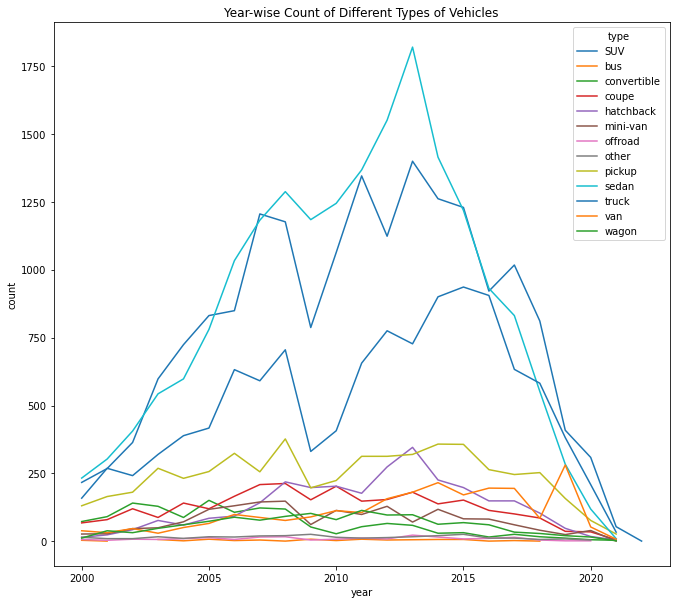

In [162]:
# plot the year-wise count of the different types of vehicles listed as line chart

vehicles_cleaned_df.groupby("type").year.value_counts().unstack(0).plot.line(figsize = (9.5, 8.5))
plt.title("Year-wise Count of Different Types of Vehicles")
plt.ylabel("count")
plt.tight_layout()
plt.savefig("../output_data/Year-wise Count of Different Types of Vehicles.png")

# Observation
* The year-wise trend of number of different types of cars listed shows that over the years from 2000 to 2022, SUV and sedan are always the types with highest number of cars listed. Also, a sharp rise in the number of cars listed can be observed in 2014. This was due to the lower gas prices in US. 
* Reference: https://www.detroitnews.com/story/business/autos/2015/01/02/suvs-trucks-tow-vehicle-sales/21215945/

In [192]:
# create a dataframe for only the top 2 types of vehicles listed - SUV and sedan

manufacturer_df = vehicles_cleaned_df[(vehicles_cleaned_df["type"].
                                       str.contains("SUV")) | 
                                      (vehicles_cleaned_df["type"].
                                       str.contains("sedan"))]
manufacturer_df = manufacturer_df[["id", "price", "type", 
                                   "manufacturer", "year"]]

In [196]:
# find the top 3 manufacturers of SUV and sedan

top_manufacturer = manufacturer_df.groupby("type")["manufacturer"].apply(lambda x: x.value_counts().head(3)).reset_index()
top_manufacturer.rename(columns = {"level_1": "manufacturer", "manufacturer": "count"}, inplace = True)
top_manufacturer

,type,manufacturer,count
0,SUV,ford,2553
1,SUV,jeep,2229
2,SUV,chevrolet,2185
3,sedan,chevrolet,1989
4,sedan,toyota,1959
5,sedan,honda,1935


# Observation
* The top 3 manufacturers of suv are Ford, Jeep and Chevrolet and the top 3 manufacturers of sedan are Chevrolet, Toyota and Honda.

In [188]:
# create a dataframe for only the top 3 manufacturers of SUV and sedan

manufacturer_max = manufacturer_df[((manufacturer_df["type"].str.contains("SUV") & manufacturer_df["manufacturer"].str.contains("ford"))|
                                    (manufacturer_df["type"].str.contains("SUV") & manufacturer_df["manufacturer"].str.contains("jeep"))|
                                    (manufacturer_df["type"].str.contains("SUV") & manufacturer_df["manufacturer"].str.contains("chevrolet"))|
                                    (manufacturer_df["type"].str.contains("sedan") & manufacturer_df["manufacturer"].str.contains("chevrolet"))|
                                    (manufacturer_df["type"].str.contains("sedan") & manufacturer_df["manufacturer"].str.contains("toyota"))|
                                    (manufacturer_df["type"].str.contains("sedan") & manufacturer_df["manufacturer"].str.contains("honda")))]
manufacturer_max = manufacturer_max.reset_index(drop = True)

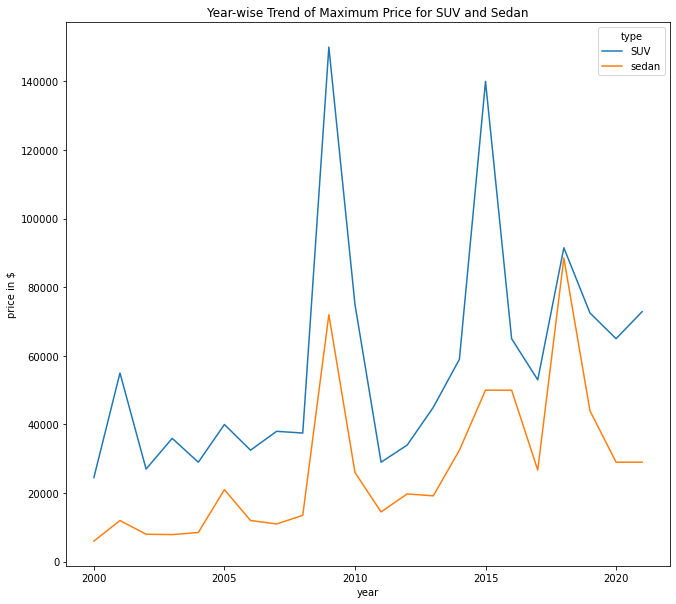

In [165]:
# plot the year-wise maximum price of the top 3 manufacturers of SUV and sedan as line chart

manufacturer_max.groupby(["year", "type"])["price"].max().unstack().plot.line(figsize = (9.5, 8.5))
plt.title("Year-wise Trend of Maximum Price for SUV and Sedan")
plt.ylabel("price in $")
plt.tight_layout()
plt.savefig("../output_data/Year-wise Trend of Maximum Price for SUV and Sedan.png")

# Observation
* It can be observed that the maximum price of suv and sedan have been rising over the years since 2000. 
* There was a sharp rise in the price in 2009 and 2014. This was because of the weak economy and falling supply of new cars. 
* Reference: https://www.usatoday.com/story/money/cars/2015/02/18/record-used-car-prices-in-2014/23637775/, https://www.cnbc.com/2009/10/13/expect-used-car-prices-to-stay-high.html

In [187]:
# find the maximum price of the top 3 manufacturers of SUV and sedan

max_p = manufacturer_max.groupby(["type","manufacturer"])["price"].max()
max_df = max_p.reset_index()

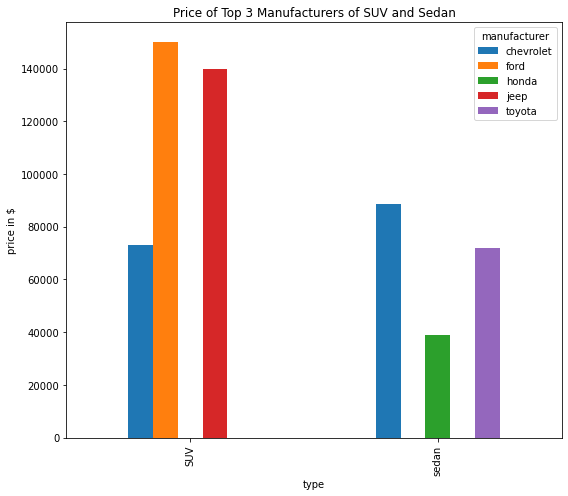

In [164]:
# plot the price of the top 3 manufacturers of SUV and sedan as bar chart

max_p.unstack().plot.bar(figsize = (8, 7))
plt.title("Price of Top 3 Manufacturers of SUV and Sedan")
plt.ylabel("price in $")
plt.tight_layout()
plt.savefig("../output_data/Price of Top 3 Manufacturers of SUV and Sedan.png")

# Observation
* It can be seen that the in the case of SUV, Ford has the maximum price listed and in the case of sedan, Chevrolet has the maximum price listed.

# Conclusions
* From among the 13 different types of vehicles listed, SUV and sedan holds the highest percentage with 27.1% and 28.5% respectively.
* The top 5 types of vehicles that are listed are: sedan, SUV, truck, pickup and hatchback and the lowest 5 types of vehicles that are listed are: bus, offroad, wagon,convertible and  mini-van.
* The year-wise trend of number of different types of cars listed shows that over the years from 2000 to 2022, SUV and sedan are always the types with highest number of cars listed. Also, a sharp rise in the number of cars listed can be observed in 2014. This was due to the lower gas prices in US. 
* The top 3 manufacturers of suv are Ford, Jeep and Chevrolet and the top 3 manufacturers of sedan are Chevrolet, Toyota and Honda.
* The maximum price of suv and sedan have been rising over the years since 2000. There was a sharp rise in the price in 2009 and 2014. This was because of the weak economy and falling supply of new cars.
* In the case of SUV, Ford has the maximum price listed and in the case of sedan, Chevrolet has the maximum price listed.